Do the following exercise.

1) Clone https://github.com/adamnguyenitvn/bigdata_labs_2019

2) Open sales.ipynb

3) Make a copy of sales.ipynb, name it with your student ID

4) Do the exercise

5) Write your github username here http://socrates.io/#KFCbqAn  . We will add you to the repos for push permission

6) Check your email for github invitation

7) Push your Jupyter notebook to github

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re

#### Import the data and get a high-level picture

In [13]:
df = pd.read_csv('sales.csv')
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50


In [3]:
df.shape

(29922, 6)

In [4]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

#### TODO: Fix column datatypes

Change ordered_at to datetime

Change price and line_total to float

In [0]:
import datetime
def convert_datetime(txt):
  return datetime.datetime.strptime(txt, '%Y-%m-%d %H:%M:%S')

df['ordered_at'] = df['ordered_at'].apply(convert_datetime)

In [0]:
def convert_float(txt):
  return float(txt[1:])

df['price'] = df['price'].apply(convert_float)
df['line_total'] = df['line_total'].apply(convert_float)

In [28]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

#### TODO: drop if duplicated or null

In [0]:
df = df.drop_duplicates()
df = df.dropna()

In [26]:
df[df.duplicated()].shape[0]

0

In [25]:
df.isnull().sum()

order_id      0
name          0
ordered_at    0
price         0
quantity      0
line_total    0
dtype: int64

In [27]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total


#### Sanity check for value ranges and to check assumptions

In [29]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

28

In [23]:
df[df['line_total'] < 0].shape[0]

282

#### TODO: 
Set line_total = price * quantity if different
Remove if line total < 0

In [0]:
 df = df[(df['price'] * df['quantity']) == df['line_total']]
 df = df[df['line_total'] > 0]

In [33]:
df.describe()

,order_id,price,quantity,line_total
count,27596.000000,27596.000000,27596.000000,27596.000000
mean,14993.365995,2.511596,2.000833,5.028845
std,2888.622150,1.059402,0.819472,3.085841
min,10000.000000,0.500000,1.000000,0.500000
25%,12499.000000,1.500000,1.000000,2.500000
50%,14972.500000,2.500000,2.000000,4.500000
75%,17506.250000,3.500000,3.000000,7.500000
max,19999.000000,4.000000,3.000000,12.000000


#### TODO: Get value between "" in name and put it in category column

In [0]:
def get_category(txt):
  return txt.split('"')[1]
def get_name(txt):
  return (txt.split('"')[2])[1:]
df['category'] = df['name'].apply(get_category)
df['name'] = df['name'].apply(get_name)

In [37]:
df.head()

,order_id,name,ordered_at,price,quantity,line_total,category
0,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,3,10.5,ICE CREAM
1,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,1,3.5,ICE CREAM
2,10001,Raspberry,2018-01-01 12:14:54,2.5,2,5.0,SORBET
4,10001,Dipped Waffle Cone,2018-01-01 12:14:54,3.5,1,3.5,CONE
5,10002,Lychee,2018-01-01 12:23:09,3.0,1,3.0,SORBET


#### Analysis, finally!

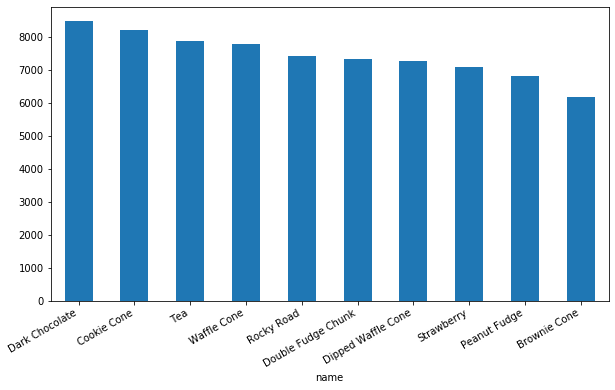

In [38]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()